In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
name_cols = []
with open('datasets/adult.names') as file:
    for f in file.readlines():
        if not str(f).startswith('|') and ':' in str(f):
            name_cols.append(str(f).split(':')[0])
name_cols.append('Salary')

In [3]:
df = pd.read_csv('datasets/adult.data', names=name_cols)

In [4]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
## so no null values

In [7]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
for i in df.columns:
    print(i)
    print(df[i].nunique(), " Unique Values")
    print(" ")

age
73  Unique Values
 
workclass
9  Unique Values
 
fnlwgt
21648  Unique Values
 
education
16  Unique Values
 
education-num
16  Unique Values
 
marital-status
7  Unique Values
 
occupation
15  Unique Values
 
relationship
6  Unique Values
 
race
5  Unique Values
 
sex
2  Unique Values
 
capital-gain
119  Unique Values
 
capital-loss
92  Unique Values
 
hours-per-week
94  Unique Values
 
native-country
42  Unique Values
 
Salary
2  Unique Values
 


In [5]:
object_cols = []
for i, enum in enumerate(df.dtypes):
    if enum=='object':
        object_cols.append(i)

for i in range(len(object_cols)):
    object_cols[i] = df.dtypes.index[object_cols[i]]

In [19]:
object_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'Salary']

In [6]:
def correct_names(name):
    if name.startswith(" ") or name.endswith(" "):
        return name.strip(" ")
    else:
        return name

In [7]:
for i in object_cols:
    df[i] = df[i].apply(correct_names)

In [8]:
df['native-country'].value_counts().iloc[:11]

United-States    29170
Mexico             643
?                  583
Philippines        198
Germany            137
Canada             121
Puerto-Rico        114
El-Salvador        106
India              100
Cuba                95
England             90
Name: native-country, dtype: int64

In [26]:
df[df['native-country']=='India']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
892,28,Private,164170,Assoc-voc,11,Married-civ-spouse,Adm-clerical,Wife,Asian-Pac-Islander,Female,0,0,40,India,<=50K
968,48,Private,164966,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
1029,48,Self-emp-inc,138370,Masters,14,Married-spouse-absent,Sales,Not-in-family,Asian-Pac-Islander,Male,0,0,50,India,<=50K
1095,22,Self-emp-not-inc,361280,Bachelors,13,Never-married,Prof-specialty,Own-child,Asian-Pac-Islander,Male,0,0,20,India,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30152,48,Private,119471,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
30833,25,Private,110978,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,Asian-Pac-Islander,Female,0,0,37,India,>50K
30871,26,Private,160261,Masters,14,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,Male,0,0,20,India,<=50K
31327,38,State-gov,125499,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,7688,0,60,India,>50K


In [27]:
df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [ ]:
# - age – The age of the individual. This is continuous attribute.

# - type_employer – The type of the employer that the individual has. This is nominal attribute. The levels of the attributes: Federal-gov, Local-gov, Never-worked, Private, Self-emp-inc, Self-emp-not-inc, State-gov, and Without-pay.

# - fnlwgt – The number of people the census takers believe that observation represents. This is continuous attribute.

# - education – The highest level of education achieved for that individual. This is nominal attribute. The ordered levels of the attributes: Preschool < 1st-4th < 5th-6th < 7th-8th < 9th < 10th < 11th < 12th < HS-grad < Prof-school < Assoc-acdm < Assoc-voc < Some-college < Bachelors < Masters < Doctorate.

# - education_num – Highest level of education in numerical form. This is continuous attribute.

# - marital – Marital status of the individual. This is nominal attribute. The levels of the attributes: Divorced, Married-AF-spouse, Married-civ-spouse, Married-spouse-absent, Never-married, Separated, and Widowed.

# - occupation – The occupation of the individual. This is nominal attribute. The levels of the attributes: Adm-clerical, Armed-Forces, Craft-repair, Exec-managerial, Farming-fishing, Handlers-cleaners, Machine-op-inspct, Other-service, Priv-house-serv, Prof-specialty, Protective-serv, Sales, Tech-support, and Transport-moving.

# - relationship – The family relationship of the individual. This is nominal attribute. The levels of the attributes: Husband, Not-in-family, Other-relative, Own-child, Unmarried, and Wife.

# - race – The descriptions of the individuals race. This is nominal attribute. The levels of the attributes: Amer-Indian-Eskimo, Asian-Pac-Islander, Black, Other, and White.

# - sex – Biological Sex. This is nominal attribute. The levels of the attributes: Female and Male.

# - capital_gain – Capital gains recorded. This is continuous attribute.

# - capital_loss – Capital Losses recorded. This is continuous attribute.

# - hr_per_week – Hours worked per week. This is continuous attribute.

# - country – Country of origin for person. This is nominal attribute. The levels of the attributes: Cambodia, Canada, China, Columbia, Cuba, Dominican-Republic, Ecuador, El-Salvador, England, France, Germany, Greece, Guatemala, Haiti, Holand-Netherlands, Honduras, Hong, Hungary, India, Iran, Ireland, Italy, Jamaica, Japan, Laos, Mexico, Nicaragua, Outlying-US(Guam-USVI-etc), Peru, Philippines, Poland, Portugal, Puerto-Rico, Scotland, South, Taiwan, Thailand, Trinadad&Tobago, United-States, Vietnam, and Yugoslavia.

# - income – Whether or not the person makes more than $50,000/year income. This is nominal attribute. The levels of the attributes: <=50K, and >50K.

In [28]:
df['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

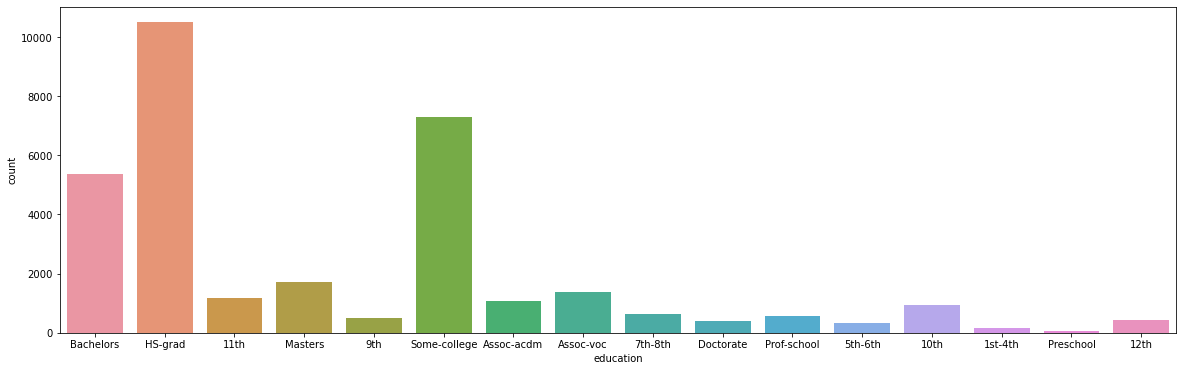

In [9]:
plt.figure(figsize=(20,6))
sns.countplot(df['education'])

In [15]:
corr = df.corr()

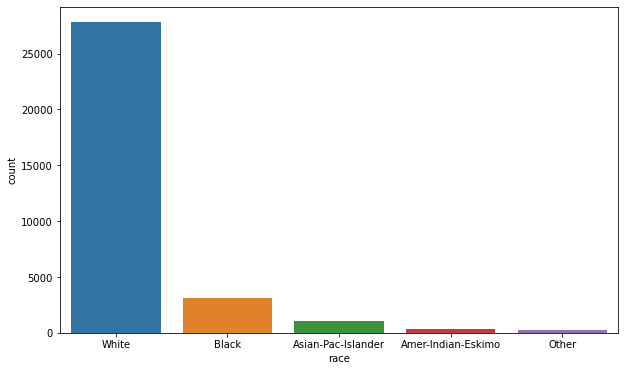

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(df['race'])

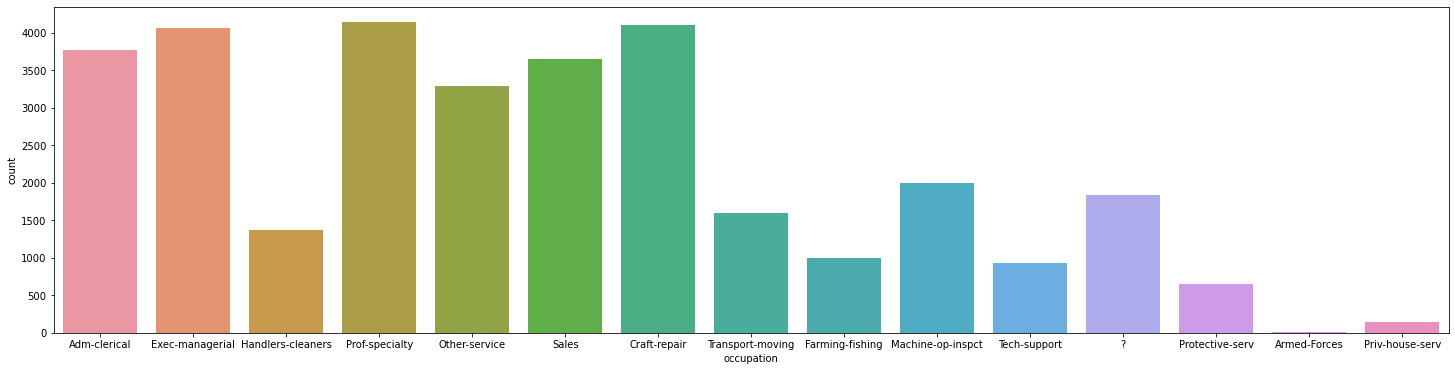

In [27]:
plt.figure(figsize=(25,6))
sns.countplot(df['occupation'])

In [36]:
def get_country(name):
    if name not in native_country_top or name=='?':
        return "Others"
    else:
        return name

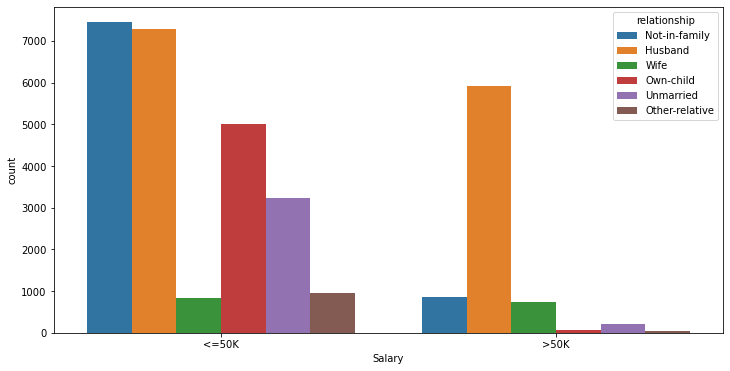

In [51]:
plt.figure(figsize=(12,6))
sns.countplot(x="Salary", data=df, hue="relationship")

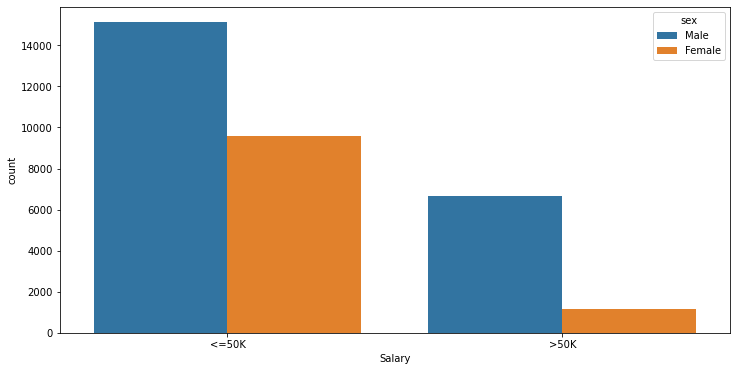

In [52]:
plt.figure(figsize=(12,6))
sns.countplot(x="Salary", data=df, hue="sex")

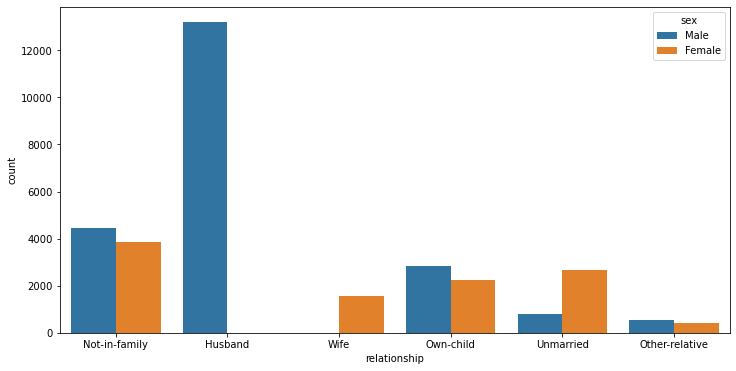

In [53]:
plt.figure(figsize=(12,6))
sns.countplot(x="relationship", data=df, hue="sex")

In [61]:
df[df['Salary']==">50K"]['native-country'].value_counts()

United-States         7171
?                      146
Philippines             61
Germany                 44
India                   40
Canada                  39
Mexico                  33
England                 30
Italy                   25
Cuba                    25
Japan                   24
Taiwan                  20
China                   20
Iran                    18
South                   16
Puerto-Rico             12
Poland                  12
France                  12
Jamaica                 10
El-Salvador              9
Greece                   8
Cambodia                 7
Hong                     6
Yugoslavia               6
Ireland                  5
Vietnam                  5
Ecuador                  4
Portugal                 4
Haiti                    4
Hungary                  3
Scotland                 3
Thailand                 3
Guatemala                3
Trinadad&Tobago          2
Peru                     2
Laos                     2
Nicaragua                2
D

In [62]:
df_temp2 = df.copy()

In [63]:
native_country_new = df[df['Salary']==">50K"]['native-country'].value_counts().index[:10]
def get_country(name):
    if name not in native_country_new or name=='?':
        return "Others"
    else:
        return name

In [64]:
df_temp2['native-country'] = df_temp2['native-country'].apply(get_country)

In [65]:
df_temp2

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


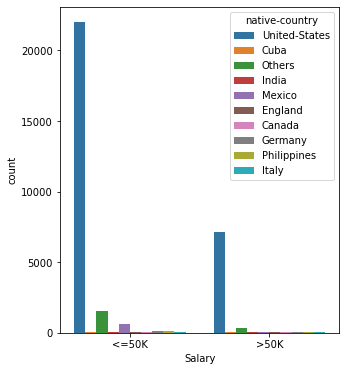

In [67]:
plt.figure(figsize=(5,6))
sns.countplot(x="Salary", data=df_temp2, hue="native-country")

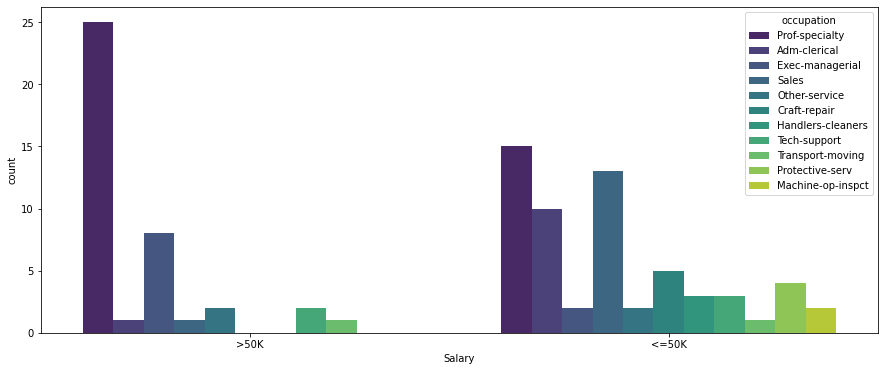

In [73]:
plt.figure(figsize=(15,6))
sns.countplot(x="Salary", data=df_temp2[df_temp2['native-country']=="India"], hue="occupation", palette='viridis')

In [84]:
data2 = np.where(df_temp2['Salary']=='<=50K', 0, 1)

In [86]:
data2

array([0, 0, 0, ..., 0, 0, 1])

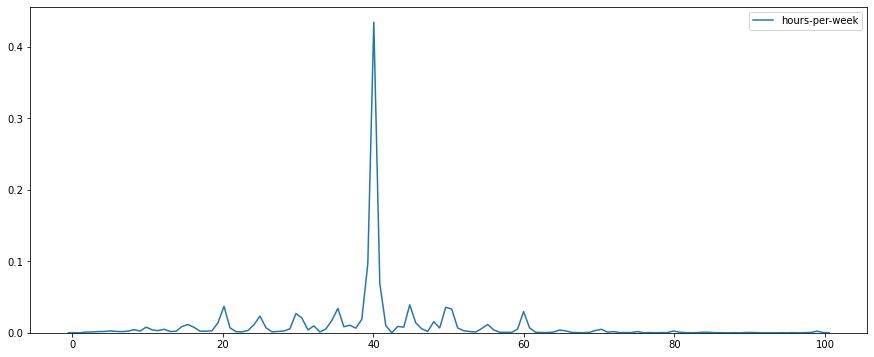

In [88]:
plt.figure(figsize=(15,6))
sns.kdeplot(df_temp2[df_temp2['Salary']=="<=50K"]['hours-per-week'])

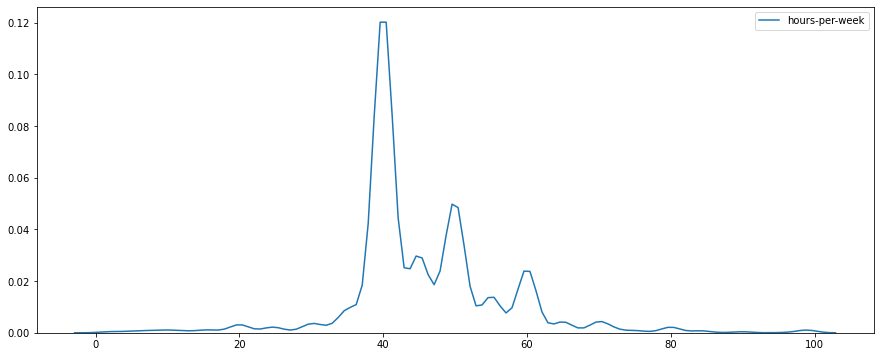

In [92]:
plt.figure(figsize=(15,6))
sns.kdeplot(df_temp2[df_temp2['Salary']==">50K"]['hours-per-week'], )

In [94]:
df[['education', 'education-num']].sort_values(by='education-num')

,education,education-num
22940,Preschool,1
13248,Preschool,1
21370,Preschool,1
25943,Preschool,1
21388,Preschool,1
...,...,...
10647,Doctorate,16
12074,Doctorate,16
28758,Doctorate,16
4597,Doctorate,16


In [97]:
arr = df[['education', 'education-num']].to_numpy()

In [113]:
unique_arr = np.vstack({tuple(row) for row in arr})

<ipython-input-113-b362f0ee6d10>:1: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



In [114]:
unique_arr = unique_arr.tolist()

In [118]:
unique_arr = sorted(unique_arr, key=lambda x:int(x[1]))

In [119]:
unique_arr

[['Preschool', '1'],
 ['1st-4th', '2'],
 ['5th-6th', '3'],
 ['7th-8th', '4'],
 ['9th', '5'],
 ['10th', '6'],
 ['11th', '7'],
 ['12th', '8'],
 ['HS-grad', '9'],
 ['Some-college', '10'],
 ['Assoc-voc', '11'],
 ['Assoc-acdm', '12'],
 ['Bachelors', '13'],
 ['Masters', '14'],
 ['Prof-school', '15'],
 ['Doctorate', '16']]

In [120]:
df_temp2

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [121]:
df.groupby('Salary')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
Salary,,,,,,,,
<=50K,24720.0,36.783738,14.020088,17.0,25.0,34.0,46.0,90.0
>50K,7841.0,44.249841,10.519028,19.0,36.0,44.0,51.0,90.0


In [128]:
df[df['age']==min(df['age'])]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
209,17,Private,65368,11th,7,Never-married,Sales,Own-child,White,Female,0,0,12,United-States,<=50K
262,17,Private,245918,11th,7,Never-married,Other-service,Own-child,White,Male,0,0,12,United-States,<=50K
271,17,Private,191260,9th,5,Never-married,Other-service,Own-child,White,Male,1055,0,24,United-States,<=50K
335,17,Private,270942,5th-6th,3,Never-married,Other-service,Other-relative,White,Male,0,0,48,Mexico,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31772,17,?,256173,10th,6,Never-married,?,Own-child,White,Female,0,0,15,United-States,<=50K
31864,17,Private,214787,12th,8,Never-married,Adm-clerical,Own-child,White,Female,0,0,25,United-States,<=50K
31959,17,Private,24090,HS-grad,9,Never-married,Exec-managerial,Own-child,White,Female,0,0,35,United-States,<=50K
32282,17,Private,311907,11th,7,Never-married,Other-service,Own-child,White,Male,0,0,25,United-States,<=50K


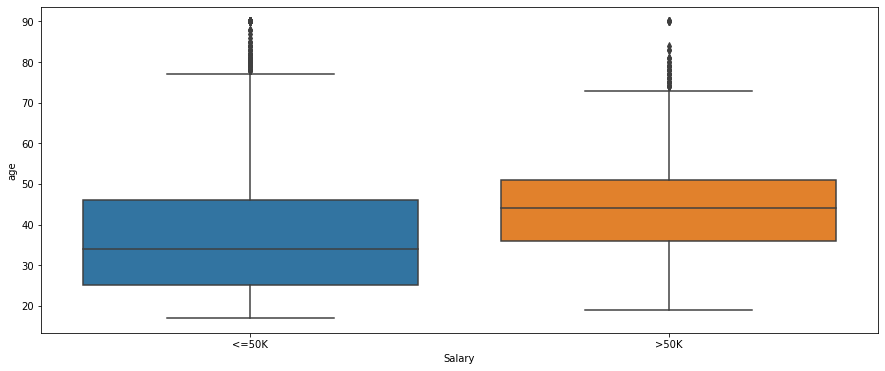

In [132]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Salary', y='age', data=df)

In [134]:
object_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'Salary']

In [135]:
df_temp2['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [136]:
df_temp2[df_temp2['workclass']=='Never-worked']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
5361,18,Never-worked,206359,10th,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
10845,23,Never-worked,188535,7th-8th,4,Divorced,?,Not-in-family,White,Male,0,0,35,United-States,<=50K
14772,17,Never-worked,237272,10th,6,Never-married,?,Own-child,White,Male,0,0,30,United-States,<=50K
20337,18,Never-worked,157131,11th,7,Never-married,?,Own-child,White,Female,0,0,10,United-States,<=50K
23232,20,Never-worked,462294,Some-college,10,Never-married,?,Own-child,Black,Male,0,0,40,United-States,<=50K
32304,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,?,Wife,Black,Female,0,0,40,United-States,<=50K
32314,18,Never-worked,153663,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,<=50K


In [137]:
df_temp2[df_temp2['workclass']=='Without-pay']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
1901,65,Without-pay,27012,7th-8th,4,Widowed,Farming-fishing,Unmarried,White,Female,0,0,50,United-States,<=50K
9257,19,Without-pay,344858,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,20,United-States,<=50K
15533,21,Without-pay,232719,HS-grad,9,Never-married,Craft-repair,Own-child,Black,Male,0,0,40,United-States,<=50K
15695,22,Without-pay,302347,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,4416,0,40,United-States,<=50K
16812,46,Without-pay,142210,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,25,United-States,<=50K
20073,65,Without-pay,172949,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,2414,0,20,United-States,<=50K
21944,52,Without-pay,198262,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,30,United-States,<=50K
22215,19,Without-pay,43887,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K
24596,62,Without-pay,170114,Assoc-acdm,12,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
25500,29,Without-pay,212588,Some-college,10,Married-civ-spouse,Farming-fishing,Own-child,White,Male,0,0,65,United-States,<=50K


In [138]:
df[df['education-num']==min(df['education-num'])]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
224,53,Local-gov,140359,Preschool,1,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,35,United-States,<=50K
932,51,Local-gov,241843,Preschool,1,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,<=50K
2884,71,Private,235079,Preschool,1,Widowed,Craft-repair,Unmarried,Black,Male,0,0,10,United-States,<=50K
2946,31,Private,452405,Preschool,1,Never-married,Other-service,Other-relative,White,Female,0,0,35,Mexico,<=50K
3446,33,Private,239781,Preschool,1,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,Mexico,<=50K
3592,39,?,362685,Preschool,1,Widowed,?,Not-in-family,White,Female,0,0,20,El-Salvador,<=50K
4107,52,Private,416129,Preschool,1,Married-civ-spouse,Other-service,Not-in-family,White,Male,0,0,40,El-Salvador,<=50K
6433,27,Private,211032,Preschool,1,Married-civ-spouse,Farming-fishing,Other-relative,White,Male,41310,0,24,Mexico,<=50K
6864,54,Private,286989,Preschool,1,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,60,United-States,<=50K
7070,30,Private,193598,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,Mexico,<=50K


In [139]:
df[df['education-num']==min(df['education-num'])].count()

age               51
workclass         51
fnlwgt            51
education         51
education-num     51
marital-status    51
occupation        51
relationship      51
race              51
sex               51
capital-gain      51
capital-loss      51
hours-per-week    51
native-country    51
Salary            51
dtype: int64

In [140]:
df[df['Salary']=='>50K']['education'].value_counts()

Bachelors       2221
HS-grad         1675
Some-college    1387
Masters          959
Prof-school      423
Assoc-voc        361
Doctorate        306
Assoc-acdm       265
10th              62
11th              60
7th-8th           40
12th              33
9th               27
5th-6th           16
1st-4th            6
Name: education, dtype: int64

In [141]:
df[(df['Salary']=='>50K') & (df['education-num']==2)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
2817,41,Private,237321,1st-4th,2,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,>50K
10264,52,Private,177995,1st-4th,2,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,56,Mexico,>50K
13682,52,Private,117295,1st-4th,2,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
19576,53,Self-emp-not-inc,145419,1st-4th,2,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,67,Italy,>50K
21097,54,Private,167552,1st-4th,2,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,Haiti,>50K
29322,60,Private,532845,1st-4th,2,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Mexico,>50K


In [142]:
df[(df['Salary']=='>50K') & (df['native-country']=="India")]['occupation'].value_counts()

Prof-specialty      25
Exec-managerial      8
Other-service        2
Tech-support         2
Transport-moving     1
Sales                1
Adm-clerical         1
Name: occupation, dtype: int64

In [143]:
df_temp2['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [144]:
df_temp2[df_temp2['occupation']=='?']['Salary'].value_counts()

<=50K    1652
>50K      191
Name: Salary, dtype: int64

In [146]:
df_temp2[df_temp2['occupation']=='?']['education'].value_counts()

HS-grad         533
Some-college    516
Bachelors       173
11th            119
10th            102
7th-8th          73
Assoc-voc        61
9th              51
Masters          48
Assoc-acdm       47
12th             40
5th-6th          30
Prof-school      18
Doctorate        15
1st-4th          12
Preschool         5
Name: education, dtype: int64

In [147]:
df_temp2[df_temp2['occupation']=='Other-service']['Salary'].value_counts()

<=50K    3158
>50K      137
Name: Salary, dtype: int64

In [148]:
df_temp2[df_temp2['occupation']=='Other-service']['education'].value_counts()

HS-grad         1281
Some-college     781
11th             238
10th             194
Bachelors        181
Assoc-voc        115
9th              101
7th-8th           98
12th              85
Assoc-acdm        78
5th-6th           64
1st-4th           40
Masters           19
Preschool         15
Prof-school        4
Doctorate          1
Name: education, dtype: int64

In [151]:
def remove_qm(name):
    if name == '?':
        return 'Other-service'
    else:
        return name

In [152]:
df_temp2['occupation'] = df_temp2['occupation'].apply(remove_qm)

In [153]:
df_temp2['occupation'].value_counts()

Other-service        5138
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [155]:
for i in df_temp2['workclass'].value_counts().index:
    print(i)
    print(df_temp2[df_temp2['workclass']==i]['Salary'].value_counts())
    print(" ")

Private
<=50K    17733
>50K      4963
Name: Salary, dtype: int64
 
Self-emp-not-inc
<=50K    1817
>50K      724
Name: Salary, dtype: int64
 
Local-gov
<=50K    1476
>50K      617
Name: Salary, dtype: int64
 
?
<=50K    1645
>50K      191
Name: Salary, dtype: int64
 
State-gov
<=50K    945
>50K     353
Name: Salary, dtype: int64
 
Self-emp-inc
>50K     622
<=50K    494
Name: Salary, dtype: int64
 
Federal-gov
<=50K    589
>50K     371
Name: Salary, dtype: int64
 
Without-pay
<=50K    14
Name: Salary, dtype: int64
 
Never-worked
<=50K    7
Name: Salary, dtype: int64
 


In [156]:
for i in df_temp2['relationship'].value_counts().index:
    print(i)
    print(df_temp2[df_temp2['relationship']==i]['Salary'].value_counts())
    print(" ")

Husband
<=50K    7275
>50K     5918
Name: Salary, dtype: int64
 
Not-in-family
<=50K    7449
>50K      856
Name: Salary, dtype: int64
 
Own-child
<=50K    5001
>50K       67
Name: Salary, dtype: int64
 
Unmarried
<=50K    3228
>50K      218
Name: Salary, dtype: int64
 
Wife
<=50K    823
>50K     745
Name: Salary, dtype: int64
 
Other-relative
<=50K    944
>50K      37
Name: Salary, dtype: int64
 


In [170]:
for i in df_temp2['race'].value_counts().index:
    print(i)
    print(df_temp2[df_temp2['race']==i]['Salary'].value_counts())
    print(" ")

White
<=50K    20699
>50K      7117
Name: Salary, dtype: int64
 
Black
<=50K    2737
>50K      387
Name: Salary, dtype: int64
 
Asian-Pac-Islander
<=50K    763
>50K     276
Name: Salary, dtype: int64
 
Amer-Indian-Eskimo
<=50K    275
>50K      36
Name: Salary, dtype: int64
 
Other
<=50K    246
>50K      25
Name: Salary, dtype: int64
 


In [158]:
df_temp2[df_temp2['workclass']=="?"]['occupation'].value_counts()

Other-service    1836
Name: occupation, dtype: int64

In [159]:
df_temp2['workclass'] = df_temp2['workclass'].apply(remove_qm)

In [161]:
for i in object_cols:
    if '?' in df_temp2[i].value_counts():
        print(i)

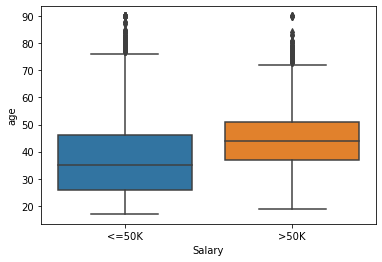

In [165]:
sns.boxplot(x='Salary', y='age', data=df_temp2[df_temp2['sex']=='Male'])

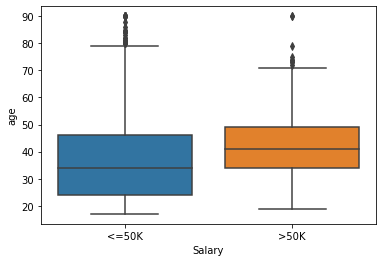

In [166]:
sns.boxplot(x='Salary', y='age', data=df_temp2[df_temp2['sex']=='Female'])

In [168]:
df_temp2.groupby(by='Salary')['capital-gain'].describe()

,count,mean,std,min,25%,50%,75%,max
Salary,,,,,,,,
<=50K,24720.0,148.752468,963.139307,0.0,0.0,0.0,0.0,41310.0
>50K,7841.0,4006.142456,14570.378951,0.0,0.0,0.0,0.0,99999.0


In [169]:
df_temp2.groupby(by='Salary')['capital-loss'].describe()

,count,mean,std,min,25%,50%,75%,max
Salary,,,,,,,,
<=50K,24720.0,53.142921,310.755769,0.0,0.0,0.0,0.0,4356.0
>50K,7841.0,195.001530,595.487574,0.0,0.0,0.0,0.0,3683.0


In [162]:
df_temp2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [167]:
X_ = df_temp2[['age', 'education-num','hours-per-week']]
y = df_temp2['Salary']

In [171]:
workclass_ = pd.get_dummies(df_temp2['workclass'], drop_first=True)
marital_ = pd.get_dummies(df_temp2['marital-status'], drop_first=True)
occupation_ = pd.get_dummies(df_temp2['occupation'], drop_first=True)
relationship_ = pd.get_dummies(df_temp2['relationship'], drop_first=True)
race_ = pd.get_dummies(df_temp2['race'], drop_first=True)
sex_ = pd.get_dummies(df_temp2['sex'], drop_first=True)
country_ = pd.get_dummies(df_temp2['native-country'], drop_first=True)

In [172]:
X = pd.concat([X_, workclass_ , marital_, occupation_, relationship_, race_, sex_, country_ ], axis=1)

In [173]:
X

,age,education-num,hours-per-week,Local-gov,Never-worked,Other-service,Private,Self-emp-inc,Self-emp-not-inc,State-gov,...,Male,Cuba,England,Germany,India,Italy,Mexico,Others,Philippines,United-States
0,39,13,40,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,50,13,13,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,38,9,40,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,53,7,40,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,28,13,40,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,38,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
32557,40,9,40,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
32558,58,9,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
32559,22,9,20,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [174]:
from sklearn.model_selection import train_test_split

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [177]:
X_train.shape

(21815, 49)

In [182]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.05, random_state=42)

In [183]:
X_val.shape

(1629, 49)

In [176]:
from sklearn.ensemble import RandomForestClassifier

In [184]:
rfc1 = RandomForestClassifier(max_depth=15)
rfc2 = RandomForestClassifier(max_depth=20)
rfc3 = RandomForestClassifier(max_depth=25)
rfc4 = RandomForestClassifier(max_depth=30)

In [185]:
for i in [rfc1, rfc2, rfc3, rfc4]:
    i.fit(X_train, y_train)

In [186]:
val1 = rfc1.predict(X_val)
val2 = rfc2.predict(X_val)
val3 = rfc3.predict(X_val)
val4 = rfc4.predict(X_val)

In [187]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [189]:
for i in [val1, val2, val3, val4]:
    print(confusion_matrix(y_val, i))
    print(classification_report(y_val, i))
    print(accuracy_score(y_val, i))
    print(" ")

[[1155   75]
 [ 179  220]]
              precision    recall  f1-score   support

       <=50K       0.87      0.94      0.90      1230
        >50K       0.75      0.55      0.63       399

    accuracy                           0.84      1629
   macro avg       0.81      0.75      0.77      1629
weighted avg       0.84      0.84      0.84      1629

0.8440761203192142
 
[[1141   89]
 [ 168  231]]
              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90      1230
        >50K       0.72      0.58      0.64       399

    accuracy                           0.84      1629
   macro avg       0.80      0.75      0.77      1629
weighted avg       0.83      0.84      0.84      1629

0.8422344996930632
 
[[1130  100]
 [ 160  239]]
              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      1230
        >50K       0.71      0.60      0.65       399

    accuracy                           0.84      1629
   ma

In [191]:
rfc5 = RandomForestClassifier(n_estimators=1000, max_depth=25)

In [192]:
rfc5.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, n_estimators=1000)

In [193]:
val5 = rfc5.predict(X_val)
print(confusion_matrix(y_val, val5))
print(classification_report(y_val, val5))
print(accuracy_score(y_val, val5))

[[1126  104]
 [ 161  238]]
              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.89      1230
        >50K       0.70      0.60      0.64       399

    accuracy                           0.84      1629
   macro avg       0.79      0.76      0.77      1629
weighted avg       0.83      0.84      0.83      1629

0.8373235113566605


In [190]:
from sklearn.svm import SVC

In [196]:
svclf1 = SVC(C=1.0)
svclf2 = SVC(C=0.1)
svclf3 = SVC(C=0.01)
svclf4 = SVC(C=10)
svclf5 = SVC(C=100)

In [197]:
for i in [svclf1, svclf2, svclf3, svclf4, svclf5]:
    i.fit(X_train, y_train)

In [198]:
val1 = svclf1.predict(X_val)
val2 = svclf2.predict(X_val)
val3 = svclf3.predict(X_val)
val4 = svclf4.predict(X_val)
val5 = svclf5.predict(X_val)

In [199]:
for i in [val1, val2, val3, val4, val5]:
    print(confusion_matrix(y_val, i))
    print(classification_report(y_val, i))
    print(accuracy_score(y_val, i))
    print(" ")

[[1161   69]
 [ 210  189]]
              precision    recall  f1-score   support

       <=50K       0.85      0.94      0.89      1230
        >50K       0.73      0.47      0.58       399

    accuracy                           0.83      1629
   macro avg       0.79      0.71      0.73      1629
weighted avg       0.82      0.83      0.81      1629

0.8287292817679558
 
[[1216   14]
 [ 333   66]]
              precision    recall  f1-score   support

       <=50K       0.79      0.99      0.88      1230
        >50K       0.82      0.17      0.28       399

    accuracy                           0.79      1629
   macro avg       0.81      0.58      0.58      1629
weighted avg       0.79      0.79      0.73      1629

0.7869858809085328
 
[[1230    0]
 [ 399    0]]
              precision    recall  f1-score   support

       <=50K       0.76      1.00      0.86      1230
        >50K       0.00      0.00      0.00       399

    accuracy                           0.76      1629
   ma

C:\Users\91836\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.




0.8434622467771639
 
[[1150   80]
 [ 172  227]]
              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90      1230
        >50K       0.74      0.57      0.64       399

    accuracy                           0.85      1629
   macro avg       0.80      0.75      0.77      1629
weighted avg       0.84      0.85      0.84      1629

0.8453038674033149
 


In [200]:
# rfc3, svclf5


In [201]:
svclf6 = SVC(C=1000)

In [202]:
svclf6.fit(X_train, y_train)

SVC(C=1000)

In [205]:
val6 = svclf6.predict(X_val)

In [206]:
print(confusion_matrix(y_val, val6))
print(classification_report(y_val, val6))
print(accuracy_score(y_val, val6))

[[1145   85]
 [ 170  229]]
              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90      1230
        >50K       0.73      0.57      0.64       399

    accuracy                           0.84      1629
   macro avg       0.80      0.75      0.77      1629
weighted avg       0.84      0.84      0.84      1629

0.8434622467771639
